# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import json
import re


plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_json('scout_car.json', lines=True) # lines=True ile satır satır okumasını sağlar.


In [3]:
df.head(5).T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={"previous owners":"previous_owners",
                  "next inspection": "next_inspection",
                  "inspection new": "inspection_new",
                  "full service": "full_service",
                  "non-smoking vehicle": "non_smoking_vehicle",
                  "offer number": "offer_number",
                  "first registration": "first_registration",
                  "body color": "body_color",
                  "paint type": "paint_type",
                  "body color original": "body_color_original",
                  "nr. of doors": "nr_of_doors",
                  "nr. of seats": "nr_of_seats",
                  "model code": "model_code",
                  "gearing type": "gearing_type",
                  "drive chain": "drive_chain",
                  "co2 emission": "co2_emission",
                  "emission class": "emission_class",
                  "comfort & convenience": "comfort_convenience",
                   "entertainment & media": "entertainment_media",
                   "safety & security": "safety_security",
                   "emission label": "emission_label",
                   "country version": "country_version",
                   "electricity consumption": "electricity_consumption",
                   "last service date": "last_service_date",
                   "other fuel types": "other_fuel_types",
                   "last timing belt service date": "last_timing_belt_service_date",
                   "available from": "available_from"}, inplace=True)

In [5]:
df.rename(columns={'\nComfort & Convenience\n': 'Comfort_Convenience', '\nEntertainment & Media\n': 'Entertainment_Media',
                  '\nExtras\n': 'Extras', '\nSafety & Security\n': 'Safety_Security'}, inplace=True)



In [6]:
df.head(5).T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kw,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kw                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  type                           15917 non-null  object 
 12  previous_owners                9279 non-null  

In [8]:
df.shape

(15919, 54)

In [9]:
((df.isna().sum() / df.shape[0]) * 100).sort_values(ascending =False) # null ların yüzdelik değerlerini görürüz.

kw                              100.000
last_timing_belt_service_date    99.899
electricity_consumption          99.139
available_from                   98.291
last_service_date                96.445
availability                     96.011
other_fuel_types                 94.472
next_inspection                  77.794
inspection_new                   75.300
emission_label                   74.967
model_code                       68.729
non_smoking_vehicle              54.916
country_version                  52.346
full_service                     48.395
weight                           43.809
drive_chain                      43.081
prev_owner                       42.892
previous_owners                  41.711
paint_type                       36.259
cylinders                        35.681
warranty                         34.047
gears                            29.600
vat                              28.350
body_color_original              23.613
upholstery                       23.368


<div class="alert alert-block alert-danger">
<p>Droping columns that have %90 percent and higher of missing values.</p></div>

In [10]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial): 
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [11]:
show_nans(df,90)

kw                              100.000
electricity_consumption          99.139
last_service_date                96.445
other_fuel_types                 94.472
availability                     96.011
last_timing_belt_service_date    99.899
available_from                   98.291
dtype: float64

In [12]:
drop_columns = show_nans(df,90).index
drop_columns

Index(['kw', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from'],
      dtype='object')

In [13]:
df.drop(drop_columns, axis = 1, inplace = True)

In [14]:
df.drop("null", axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  type                 15917 non-null  object
 11  previous_owners      9279 non-null   object
 12  next_inspection      3535 non-null   object
 13  inspection_new       3932 non-null   object
 14  warranty             10499 non-null  object
 15  full_service         8215 non-null   object
 16  non_

## 1 - url

In [16]:
df.url.value_counts(dropna=False) # 15919 adet unique değer var.

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [17]:
df.drop("url", axis = 1, inplace = True) 

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 2 - make_model

In [18]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [19]:
df.make_model.isnull().sum()

0

## 3 - short_description 

In [20]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [21]:
df.drop("short_description", axis = 1, inplace = True) 

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 4 - body_type

In [22]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## 5 - price

In [23]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [24]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [25]:
df.price.isnull().sum() # null yok.

0

<AxesSubplot:xlabel='price'>

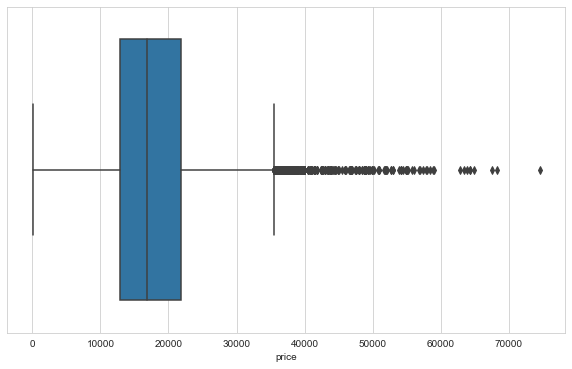

In [26]:
sns.boxplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

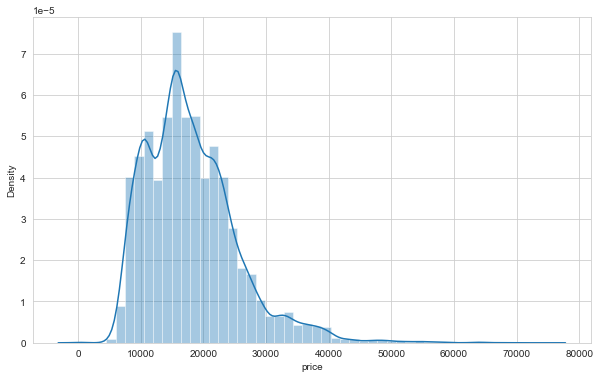

In [27]:
sns.distplot(df.price)

<div class="alert alert-block alert-success">
<p>The target label.</p></div>

## 6 - vat

The Value Added Tax, or VAT, in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [28]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## 7 - km

In [29]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [30]:
df.km = df.km.str.replace(",", "").str.extract("(\d{1,8})")[0].astype("float") 

# astype çalışması için [0] ile seriye çevirdik.

In [31]:
df.km.value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

## 8 - registration 

In [32]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [33]:
df.drop("registration", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use first registration so there is no need for this column.</p></div>

## 9 - prew_owner 

In [34]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [35]:
df.drop("prev_owner", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use Previous Owners so there is no need for this column.</p></div>

## 10 - hp

In [36]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [37]:
df["hp_kW"] = df.hp.str.extract("(\d{1,4})")[0].astype("float")

In [38]:
df["hp_kW"].value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000        3
168.000       3
98.000        3
93.000        3
228.000       2
270.000       2
53.000        2
140.000       2
86.000        2
167.000       2
127.000 

In [39]:
df.drop('hp', axis=1, inplace=True)

## 11 - type

In [40]:
df.type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [41]:
df.type = df.type.str[1]

In [42]:
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## 12 - previous_owners

In [43]:
df.previous_owners.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [44]:
df.previous_owners = [item[0] if type(item) == list else item for item in df.previous_owners]  # let's rename and appyl my method

In [45]:
df.previous_owners = df.previous_owners.str.strip("\n").astype('float')

In [46]:
df.previous_owners.value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: previous_owners, dtype: int64

## 13 - next_inspection

In [47]:
df.next_inspection.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64

In [48]:
df.drop("next_inspection", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use Inspection New so there is no need for this column.</p></div>

## 14 - inspection_new

In [49]:
df.inspection_new.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [50]:
df.inspection_new = df.inspection_new.apply(lambda x : x[0] if type(x) == list else x).str.strip("\n")

In [51]:
df.inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

## 15 - warranty

In [52]:
df.warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [53]:
df.warranty=df.warranty.apply(lambda x:x[0] if type(x)==list else x).str.strip("\n").str.extract("(\d{1,2})")[0].astype("float")
df.warranty

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
15914   24.000
15915      NaN
15916      NaN
15917      NaN
15918      NaN
Name: warranty, Length: 15919, dtype: float64

In [54]:
df.warranty.value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: warranty, dtype: int64

## 16 - full_service

In [55]:
df.full_service.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [56]:
df.drop("full_service", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 17 - non_smoking_vehicle

In [57]:
df.non_smoking_vehicle.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [58]:
df.drop("non_smoking_vehicle", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 18 - make

In [59]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [60]:
df.make = df.make.str.strip("\n")
df.make

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: make, Length: 15919, dtype: object

In [61]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [62]:
df.drop("make", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use make_model so there is no need for this column.</p></div>

## 19 - model

In [63]:
df.model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [64]:
df.model = df.model.str[1]

In [65]:
df.model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [66]:
df.drop("model", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use make_model so there is no need for this column.</p></div>

## 20 - offer_number

In [67]:
df.offer_number.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: offer_number, Length: 11441, dtype: int64

In [68]:
df.drop("offer_number", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 21 - first_registration

In [69]:
df.first_registration.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [70]:
df.first_registration = df.first_registration.str[1].astype("float")

In [71]:
df.first_registration

0       2016.000
1       2017.000
2       2016.000
3       2016.000
4       2016.000
          ...   
15914        NaN
15915   2019.000
15916   2019.000
15917   2019.000
15918   2019.000
Name: first_registration, Length: 15919, dtype: float64

In [72]:
df['age'] = 2019 - df.first_registration

In [73]:
df.age.value_counts(dropna=False) 

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [74]:
df.drop("first_registration", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Now that the age column has been created, first_reg. we can drop it..</p></div>


## 22 - body_color

In [75]:
df.body_color.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [76]:
df.body_color = df.body_color.str[1]

In [77]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

## 23 - paint_type

In [78]:
df.paint_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [79]:
df.paint_type = df.paint_type.str[0].str.strip("\n")

In [80]:
df.paint_type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

## 24 - body_color_original

In [81]:
df.body_color_original.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [82]:
df.drop("body_color_original", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>There are expressions in German we can drop it..</p></div>


## 25 - upholstery

In [83]:
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [84]:
df.upholstery = df.upholstery.apply(lambda x: x[0] if type(x) == list else x).str.strip("\n").str.split(", ")

In [85]:
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Brown]                    12
[Cloth, Blue]              12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

In [86]:
up_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara'] 
df["upholstery_type"] = df["upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in up_type else np.nan)
# df["upholstery_type"] = [item[0] if type(item) == list and item[0] in up_type else np.nan for item in df.upholstery]

In [87]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [88]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2: return x[1]
    elif type(x) == list and x[0] in color: return x[0]
    else: return np.nan

In [89]:
df["upholstery_color"] = df.upholstery.apply(finder)

In [90]:
df.upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [91]:
df.drop("upholstery", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Since we have created upholstery_colar and upholstery_type, we can drop upholstery.
</p></div>


## 26 - body

In [92]:
df.body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [93]:
df.body = df.body.str[1]

In [94]:
df.body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

In [95]:
df.drop("body", axis = 1, inplace = True)


<div class="alert alert-block alert-danger">
<p>The same values as the body_type column.</p></div>


## 27 - nr_of_doors

In [96]:
df.nr_of_doors.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: nr_of_doors, dtype: int64

In [97]:
df.nr_of_doors = df.nr_of_doors.str[0].str.strip("\n").astype("float")

In [98]:
df.nr_of_doors.value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64

## 28 - nr_of_seats

In [99]:
df.nr_of_seats.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [100]:
df.nr_of_seats = df.nr_of_seats.str[0].str.strip("\n").astype("float")

In [101]:
df.nr_of_seats.value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64

## 29 - model_code 

In [102]:
df.model_code.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [103]:
df.drop("model_code", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 30 - gearing_type

In [104]:
df.gearing_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [105]:
df.gearing_type = df.gearing_type.str[1]

In [106]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

## 31 - displacement

In [107]:
df.displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,200 cc\n]       18
[\n1,984 cc\n]       18
[\n1,397 cc\n]       11
[\n899 cc\n]         11
[\n160 cc\n]          6
[\n929 cc\n]          5
[\n1,499 cc\n]        5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n139 cc\n]          4
[\n900 cc\n]          4
[\n1,599 cc\n]  

In [108]:
df["displacement_cc"] = df.displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

In [109]:
df["displacement_cc"].value_counts(dropna=False)

1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
NaN           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300.000        2
2.000           2
995.000         2
1496.000        1
890.000         1
1580.000        1
1995.000        1
1333.000        1
54.000          1
1533.000  

In [110]:
df.drop("displacement", axis=1, inplace=True)

## 32 - cylinders

In [111]:
df.cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [112]:
df.cylinders = df.cylinders.str[0].str.strip('\n').astype("float")

In [113]:
df.cylinders.value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64

## 33 - weight

In [114]:
df.weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: weight, Length: 435, dtype: int64

In [115]:
df["weight_kg"] = df.weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})').astype('float')

In [117]:
df["weight_kg"].value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: weight_kg, Length: 435, dtype: int64

In [118]:
df.drop("weight", axis=1, inplace=True)

## 34 - drive chain

In [119]:
df.drive_chain.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [120]:
df.drive_chain = df.drive_chain.str[0].str.strip("\n")

In [121]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

## 35 - fuel

In [122]:
df.fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [123]:
df.fuel = df.fuel.str[1].str.split("/").str[0].str.strip()

In [124]:
 df.fuel.value_counts(dropna=False) # (Particulate Filter) dan kurtulmak gerek.

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

In [125]:
df.fuel = df.fuel.str.split("(").str[0].str.strip()

In [128]:
df.fuel.value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

In [129]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine: return "Benzine"
    elif x in lpg: return "LPG/CNG"
    else:return x

In [130]:
df.fuel = df.fuel.apply(fueltype)

In [131]:
 df.fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

## 36 - consumption

In [132]:
df.consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [133]:
df.consumption = df.consumption.astype("str")

In [134]:
pd.DataFrame(df.consumption)

,consumption
0,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city..."
1,"[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city..."
2,"[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city..."
3,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city..."
4,"[['4.1 l/100 km (comb)'], ['4.6 l/100 km (city..."
...,...
15914,"[['5.3 l/100 km (comb)'], ['6.2 l/100 km (city..."
15915,"['\n', '7.4 l/100 km (comb)', '\n', '9.2 l/100..."
15916,"[['5.3 l/100 km (comb)'], ['6.2 l/100 km (city..."
15917,"[['5.3 l/100 km (comb)'], ['6.2 l/100 km (city..."


In [135]:
df['cons_comb'] = df.consumption.str.extract('(\d.\d|\d).+com', expand=True).astype(float)
df['cons_city'] = df.consumption.str.extract('(\d.\d|\d).+ci', expand=True).astype(float)
df['cons_country'] = df.consumption.str.extract('(\d.\d|\d).+cou', expand=True).astype(float)

In [136]:
df["cons_comb"].value_counts(dropna=False).head()


NaN      2033
5.400     770
3.900     733
4.000     717
5.100     657
Name: cons_comb, dtype: int64

In [137]:
df["cons_city"].value_counts(dropna=False).head()


NaN      2436
5.400     726
3.900     721
4.000     709
5.100     615
Name: cons_city, dtype: int64

In [138]:
df["cons_country"].value_counts(dropna=False).head()


NaN      2376
5.400     730
3.900     722
4.000     710
5.100     619
Name: cons_country, dtype: int64

In [139]:
df.drop("consumption", axis=1, inplace=True)

## 37 - co2_emission

In [140]:
df.co2_emission.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: co2_emission, Length: 124, dtype: int64

In [141]:
[item[0] if type(item) == list else item for item in df.co2_emission]


['\n99 g CO2/km (comb)\n',
 '\n129 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n109 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n98 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 nan,
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 nan,
 '\n99 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n103 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 nan,
 '\n95 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\

In [142]:
df.co2_emission = [item[0] if type(item) == list else item for item in df.co2_emission] 
df.co2_emission.head()

0     \n99 g CO2/km (comb)\n
1    \n129 g CO2/km (comb)\n
2     \n99 g CO2/km (comb)\n
3     \n99 g CO2/km (comb)\n
4    \n109 g CO2/km (comb)\n
Name: co2_emission, dtype: object

In [143]:
df.co2_emission = df.co2_emission.str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [144]:
df.co2_emission.value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
990.000       1
12.324        1
1.060         1
51.000        1
193.000       1
Name: co2_emission, Length: 121, dtype: int64

## 38 - emission_class

In [145]:
df.emission_class.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [146]:
df.emission_class = [i[0] if type(i) == list else i for i in df.emission_class]

In [147]:
df.emission_class

0              \nEuro 6\n
1              \nEuro 6\n
2              \nEuro 6\n
3              \nEuro 6\n
4              \nEuro 6\n
               ...       
15914                 NaN
15915                 NaN
15916    \nEuro 6d-TEMP\n
15917          \nEuro 6\n
15918          \nEuro 6\n
Name: emission_class, Length: 15919, dtype: object

In [148]:
df.emission_class = df.emission_class.str.strip("\n")

In [149]:
df.emission_class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [150]:
df.replace({"emission_class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [151]:
df.emission_class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

## 39 - comfort_convenience

In [152]:
df.comfort_convenience.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [153]:
df.comfort_convenience = [",".join(item) if type(item) == list else item for item in df.comfort_convenience] 

# ",".join(item) ile elemanları ile birleştir.

In [154]:
df.comfort_convenience.head(20)

0     Air conditioning,Armrest,Automatic climate con...
1     Air conditioning,Automatic climate control,Hil...
2     Air conditioning,Cruise control,Electrical sid...
3     Air suspension,Armrest,Auxiliary heating,Elect...
4     Air conditioning,Armrest,Automatic climate con...
5     Air conditioning,Armrest,Automatic climate con...
6     Air conditioning,Armrest,Automatic climate con...
7     Air conditioning,Armrest,Electrical side mirro...
8                        Air conditioning,Power windows
9                                                   NaN
10    Air conditioning,Multi-function steering wheel...
11    Air conditioning,Automatic climate control,Ele...
12    Air conditioning,Armrest,Automatic climate con...
13    Air conditioning,Automatic climate control,Cru...
14    Air conditioning,Automatic climate control,Cru...
15    Air conditioning,Armrest,Cruise control,Electr...
16    Air conditioning,Leather steering wheel,Power ...
17    Air conditioning,Automatic climate control

In [155]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

## 40 - entertainment_media

In [156]:
df.entertainment_media.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                 1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                    1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]     783
[On-board computer, Radio]                                                           487
Name: entertainment_media, dtype: int64

In [157]:
df.entertainment_media =[",".join(item) if type(item) == list else item for item in df.entertainment_media]  

In [158]:
df.entertainment_media.value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: entertainment_media, dtype: int64

## 41 - extras

In [159]:
df.extras.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [160]:
df.extras = df.extras.apply(lambda item: ",".join(item) if type(item) == list else item)

In [161]:
df.extras.value_counts(dropna = False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: extras, dtype: int64

## 42 - safety_security

In [162]:
df.safety_security.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [163]:
df.safety_security = df.safety_security.apply(lambda item: ",".join(item) if type(item) == list else item)

In [164]:
df.safety_security.value_counts(dropna = False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

## 43 - description

In [165]:
df.description.value_counts(dropna = False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [166]:
df.drop("description", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 44 - emission_label

In [167]:
df.emission_label.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [168]:
df.drop("emission_label", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 45 - gears

In [169]:
df.gears.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [170]:
df.gears = df.gears.str[0].str.strip('\n')

In [171]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

## 46 - country_version

In [172]:
df.country_version.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [173]:
df.country_version = df.country_version.str[0].str.strip('\n')

In [174]:
df.country_version.value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [175]:
df.drop("country_version", axis=1, inplace=True)

## The End of Part-1

In [176]:
df.head(5).T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.000,80000.000,83450.000,73000.000,16200.000
type,Used,Used,Used,Used,Used
previous_owners,2.000,NaN,1.000,1.000,1.000
inspection_new,Yes,NaN,NaN,NaN,Yes
warranty,NaN,NaN,NaN,NaN,NaN
body_color,Black,Red,Black,Brown,Black


In [177]:
df.shape


(15919, 33)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   type                 15917 non-null  object 
 6   previous_owners      9279 non-null   float64
 7   inspection_new       3932 non-null   object 
 8   warranty             4853 non-null   float64
 9   body_color           15322 non-null  object 
 10  paint_type           10147 non-null  object 
 11  nr_of_doors          15707 non-null  float64
 12  nr_of_seats          14942 non-null  float64
 13  gearing_type         15919 non-null  object 
 14  cylinders            10239 non-null  float64
 15  drive_chain          9061 non-null  

In [179]:
df.to_csv("clean_scout.csv", index=False) # index=False demezsek ekstra sütun oluşturur.

## Import Libraries and Data

In [ ]:
# df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
#df.to_csv("final_scout_not_dummy.csv", index=False)